In [59]:
from google.colab import files
upload = files.upload()

Saving NLP(Project).ipynb to NLP(Project).ipynb


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

In [61]:
df=pd.read_csv('final_data.csv',encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [62]:
df.columns =['text','product','emotion']
df.sample(10)

,text,product,emotion
7057,Kind of cool: someone is trying to do screen m...,iPad,Positive emotion
6104,RT @mention If you were able to afford to atte...,NaN,No emotion toward brand or product
8459,Oh no another way to talk shit on the net Goog...,NaN,Negative emotion
8974,GG new try at social? RT We interrupt your reg...,NaN,No emotion toward brand or product
5044,RT @mention . @mention double fisting at the k...,NaN,No emotion toward brand or product
61,#futuremf @mention {link} spec for recipes on ...,NaN,No emotion toward brand or product
7325,My #AT&amp;T iPhone user friends keep borrowin...,iPhone,Positive emotion
522,There's a free 22-song sampler available for d...,NaN,No emotion toward brand or product
349,Landed in Austin. Spotted the Google Places Ad...,NaN,No emotion toward brand or product
2686,So far the longest line at #sxsw has been at t...,NaN,No emotion toward brand or product


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   product  3291 non-null   object
 2   emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


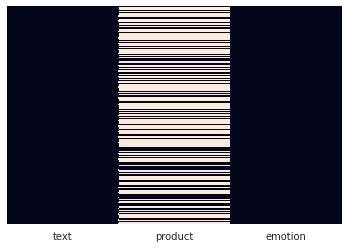

In [64]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [65]:
df.drop('product',axis=1,inplace=True)
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [66]:
df.isnull().sum()
df.dropna(inplace=True)


In [67]:
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [68]:
df['emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [69]:
df['emotion'].replace("I can't tell","No emotion toward brand or product",inplace=True)
df['emotion'].value_counts()

No emotion toward brand or product    5544
Positive emotion                      2978
Negative emotion                       570
Name: emotion, dtype: int64

In [70]:
df['emotion']=df['emotion'].map({"Negative emotion":0,"No emotion toward brand or product":1,"Positive emotion":2})
df['emotion'].value_counts()

1    5544
2    2978
0     570
Name: emotion, dtype: int64

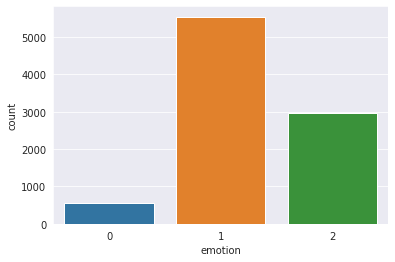

In [71]:
sns.countplot(x='emotion',data=df)


In [72]:
import re
df['text']=df['text'].apply(lambda x:x.lower())
df.head()

,text,emotion
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,0
1,@jessedee know about @fludapp ? awesome ipad/i...,2
2,@swonderlin can not wait for #ipad 2 also. the...,2
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,2


In [73]:
df['text']=df['text'].apply(lambda x:re.sub('http[s]?://\S+',' ', x))
df['text']=df['text'].apply(lambda x:re.sub(r'[^a-z]+',' ',x))
df.head()

,text,emotion
0,wesley i have a g iphone after hrs tweeting a...,0
1,jessedee know about fludapp awesome ipad ipho...,2
2,swonderlin can not wait for ipad also they sh...,2
3,sxsw i hope this year s festival isn t as cra...,0
4,sxtxstate great stuff on fri sxsw marissa may...,2


In [74]:
df['text']=df['text'].apply(lambda x:" ".join(x.split()))
df['length']=df['text'].apply(len)
df.sample(10)

,text,emotion,length
6662,rt mention smartphone breakdown at sxsw unoffi...,2,99
1805,sxsw slides gruber keeps on desk apple extende...,2,109
5935,rt mention google s new quot route around quot...,2,135
5133,rt mention mention is biyt ly for email like g...,1,90
8986,i actually have no idea what sxsw is i could g...,1,79
3611,can t believe i got in and got a seat quot goo...,1,128
2881,quot i believe in god because there is no othe...,2,126
5874,rt mention google to launch major new social n...,2,117
2565,at the android party and kinda embarrassed by ...,0,60
7853,context is everything hollrback rolls out andr...,1,81


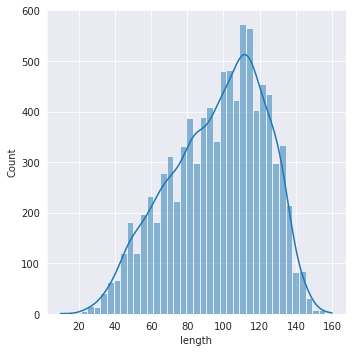

In [75]:
sns.displot(df['length'],kde=True)

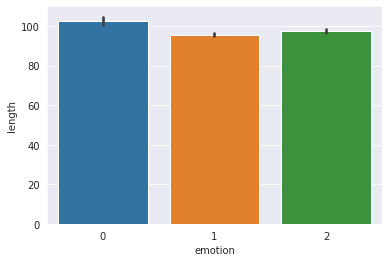

In [76]:
sns.barplot(x='emotion',y='length',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa893210d0>,
      dtype=object)

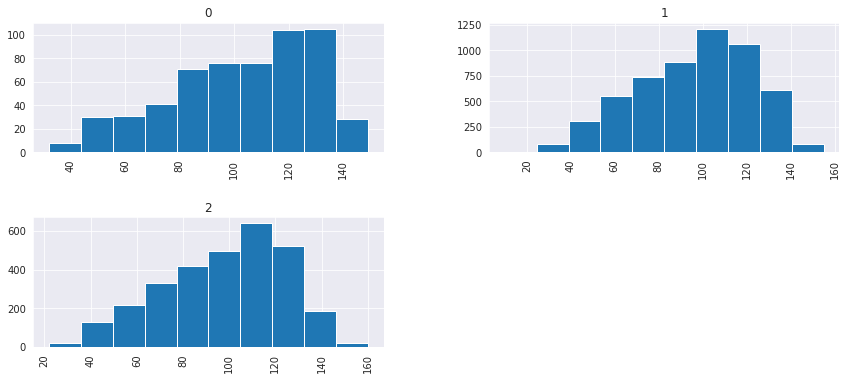

In [77]:
sns.set_style('darkgrid')
df.hist(column='length',by='emotion',figsize=(14,6))

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
def stopwords_removal(text):
    stop_word =set(stopwords.words('english'))
    return [w for w in text if w not in stop_word]

In [83]:
df['text']=df['text'].apply(stopwords_removal)
df.drop('length',axis=1,inplace=True)
df.head()

,text,emotion
0,"[wesley, g, iphone, hrs, tweeting, rise, austi...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2


In [86]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [87]:
def lemmatizer(text):
    lemma=WordNetLemmatizer()
    return [lemma.lemmatize(w) for w in text]
df['text']=df['text'].apply(lemmatizer)
df.head()

,text,emotion
0,"[wesley, g, iphone, hr, tweeting, rise, austin...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2


In [88]:
def one_letter_word_removal(text):
    return [w for w in text if len(w)>1 and w!="sxsw"]

df['text']=df['text'].apply(one_letter_word_removal)
df.head(3)

,text,emotion
0,"[wesley, iphone, hr, tweeting, rise, austin, d...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale]",2


In [89]:
df['text']=df['text'].apply(lambda x:" ".join(x))
df.head()

,text,emotion
0,wesley iphone hr tweeting rise austin dead nee...,0
1,jessedee know fludapp awesome ipad iphone app ...,2
2,swonderlin wait ipad also sale,2
3,hope year festival crashy year iphone app,0
4,sxtxstate great stuff fri marissa mayer google...,2


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X=df['text']
y=df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=10)


In [91]:
pipe1=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',MultinomialNB())  # classification algorithm
])
pipe1.fit(X_train,y_train)
predictions_nb=pipe1.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix
def metrics(y_true,y_pred):
    print(classification_report(y_true,y_pred))
metrics(y_test,predictions_nb)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.67      0.96      0.79      1409
           2       0.72      0.26      0.38       730

    accuracy                           0.67      2273
   macro avg       0.46      0.40      0.39      2273
weighted avg       0.65      0.67      0.61      2273



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [100]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [101]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [102]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [104]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
43/43 [==============================] - 12s 198ms/step - loss: -8.3107 - accuracy: 0.6013 - val_loss: -18.8723 - val_accuracy: 0.6048
Epoch 2/10
43/43 [==============================] - 8s 186ms/step - loss: -28.6815 - accuracy: 0.6068 - val_loss: -42.8841 - val_accuracy: 0.6048


In [105]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [106]:
accr = model.evaluate(test_sequences_matrix,y_test)

72/72 [==============================] - 3s 35ms/step - loss: -40.9033 - accuracy: 0.6199


In [107]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: -40.903
  Accuracy: 0.620
